### Data Science Capstone Project NanoDegree 


In [52]:
#Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from dython.nominal import associations , identify_nominal_columns , cramers_v , theils_u

#### Load in the dataset 

In [53]:
data = pd.read_csv('train.csv')

In [54]:
print(data.shape)

(381109, 12)


In [55]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [57]:
data[["Region_Code","Policy_Sales_Channel"]] = data[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")

#### Data quality checks 

In [58]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [59]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [60]:
data.duplicated().value_counts()

False    381109
dtype: int64

In [61]:
data.duplicated().value_counts()

False    381109
dtype: int64

##### No nulls - no duplicates: Prelimary Preprocessing is not required. 

#### Target Variable 

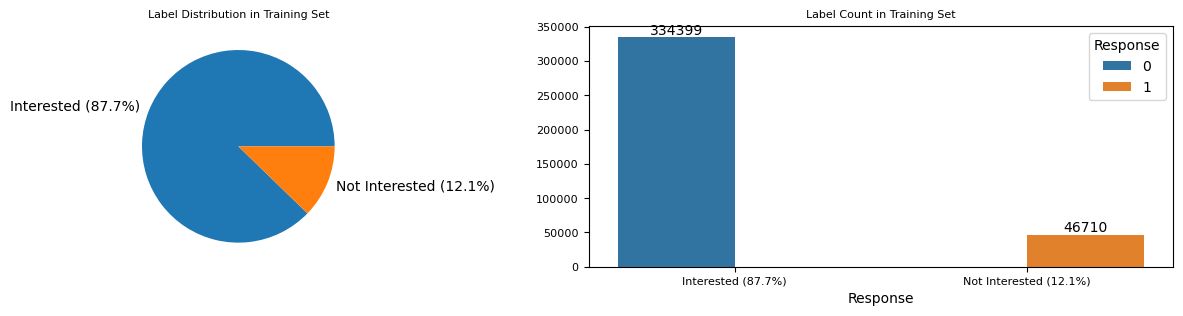

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

data.groupby('Response').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Interested (87.7%)', 'Not Interested (12.1%)'])
res = sns.countplot(x = data['Response'], hue = data['Response'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Interested (87.7%)', 'Not Interested (12.1%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

for container in res.containers:
    res.bar_label(container)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

##### Comment : 
We can observe that the target feature i.e whether a vehicle insuance holder is likely to be interested in health insurance, is highly imbalanced, with 87% of health insurance holders not having purchased a vehicle insurance.

#### Analyse the numeric features in the dataset 

In [ ]:
numerical_cols = ['Age','Annual_Premium','Vintage']

In [ ]:
data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0


In [ ]:
data[numerical_cols].skew(axis=0).to_frame('Skewed Values')

,Skewed Values
Age,0.672539
Annual_Premium,1.766087
Vintage,0.003030


In [ ]:
pp_plot_data = data.drop(['id','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)
sns.pairplot(pp_plot_data, hue="Response");


##### Feature : Age 

In [ ]:
sns.distplot(x= data.Age)
plt.title('Distribution of Age' )
plt.show() 

sns.boxplot(x=data['Response'],
        y = data['Age'], 
        data = data,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Age' )
plt.show()


In [ ]:
print(data.groupby('Response')['Age'].describe())
print(data.groupby('Response')['Age'].median())

In [ ]:
plt.figure(figsize = (15, 6))
sns.distplot(data.loc[(data['Driving_License'] == 0), 'Age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(data.loc[(data['Driving_License'] == 1), 'Age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

##### Comment : 
- Most insurance holders are between 20-30. 
- The dist plot shows a slight bi-modal distribution - A larger number of holders found in the 40-50 years age bracket. 
- The mean and median age is higher for owners interested in vehicle insurance. 
   - Response variable 1 : { Mean : 43 , Median : 43 } , 0 : { Mean : 38 , Median : 43 } 
- People aged between 30-60 are most likely to be interested
- There are no outliers inthe dataset

In [ ]:
# Plotting jointplot of Age Vs driving license
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Driving_License', data=((data[data['Driving_License']==1]).groupby('Age')['Driving_License'].sum() / data.groupby('Age')['Driving_License'].count()).reset_index());
plt.show()

plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Previously_Insured', data=((data[data['Previously_Insured']==1]).groupby('Age')['Previously_Insured'].sum() / data.groupby('Age')['Previously_Insured'].count()).reset_index());
plt.show()

##### Feature : Annual Premium 

In [ ]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'])
plt.title("Distribution of Annual premium")
plt.show()

sns.boxplot(x=data['Response'],
        y = data['Annual_Premium'], 
        data = data,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Annual Premium Cost' )
plt.semilogy()
plt.show()

In [ ]:
print(data.groupby('Response')['Annual_Premium'].median())
data.groupby('Response')['Annual_Premium'].describe()

##### Comment : 
- Annual Premium is highly positively skewed to the right. With a skew value of 1.7. 
- There is a large range in Annual Premium of 537535.0
- The mean median price Insurance holders pay per annum is 31669.0
- Mean and Median Values are slighly high where the response variable = 1 
- The box plots show there are a large number of outliers for the annual premium.

##### Feature : Vintage

In [ ]:
sns.distplot(x= data.Vintage)
plt.title('Distribution of Vintage' )
plt.show()

sns.boxplot(x=data['Response'],
        y = data['Vintage'], 
        data = data,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Vintage' )
plt.show()

##### Comment : 
The vintage column can be dropped as there does not seem to be any difference with the response variable 

In [ ]:
# pair-wise correlation between all variables
corr = data.corr()
plt.figure(figsize = (10,10))
# plotting the heatmap
sns.heatmap(abs(corr), annot=True,linewidths=3)
plt.title("Correlation Heatmap", y=1.05, size=15)

#### Categorical Variables 

In [ ]:
categorical_columns=data[['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']]

In [ ]:
col = categorical_columns.columns
cramersV = pd.DataFrame(index=['Response'],columns=categorical_columns.columns)
for i in range(len(col)): 
    v = cramers_v(categorical_columns['Response'], categorical_columns[col[i]], bias_correction=True, nan_strategy='replace', nan_replace_value=0.0)
    cramersV.loc[:,col[i]] = v
    cramersV.astype(float)
plt.figure(figsize=(20,1))
sns.heatmap(cramersV,annot=True,fmt='.2f')

In [ ]:
for i in col: 
    fig = sns.countplot(x=categorical_columns[i] , hue = categorical_columns['Response'])
    
    for container in fig.containers:
        fig.bar_label(container)
        
    plt.title('Countplot for variable {}'.format(i))
    plt.show()


##### Comment 
Gender : 
    - The gender category is almost equal 
    - Men have a slightly higher chance of buying health insurance. 

Driving Licence 
    - Most customers in the dataset have a driving licence. 
    - Of the customers who are interested in vehicle insurance the majority have a driving licence. 

Previously Insured
    - Customers who are not previously insured are likely to be interested. 
    - Very few customers (158) who are previously insured are interested. 

Vehicle Age: 
    - Customers with vechicle age 1-2 years are more likely to interested as compared to the other two
    - Customers with with Vehicle_Age <1 years have very less chance of buying Insurance